# test a Linear
- https://www.notion.so/group-delay-filter-21c6e646601c4502a30e2d8a17a31386?pvs=4

In [209]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["font.size"] = 16
plt.rcParams.update({"text.usetex": True,"font.family": "sans-serif","font.sans-serif": ["Helvetica"]})

In [210]:
plt.rcParams.update(plt.rcParamsDefault)

## 1. Generate a test signal
 
* A simple test signal $\boldsymbol{y} = \{ y_i \}$ is generated with a fixed sampling frequency using the function:

$$y(t) = m_0 \sin(2\pi f_0 t) + m_1 \sin(2\pi f_1 t)$$

* The power spectrum is plotted as the magnitude of the discrete fourier transform (DFT): $|\hat{\boldsymbol{y}}|$

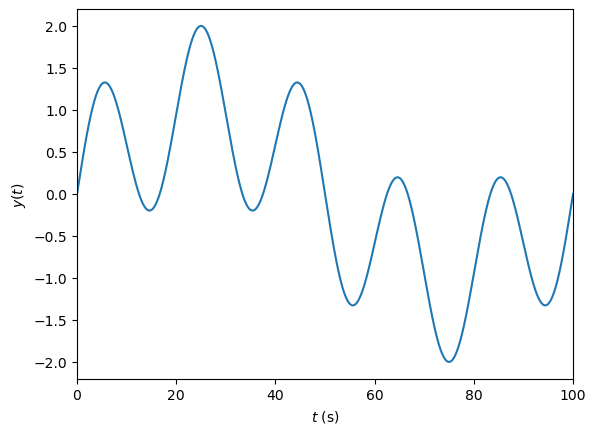

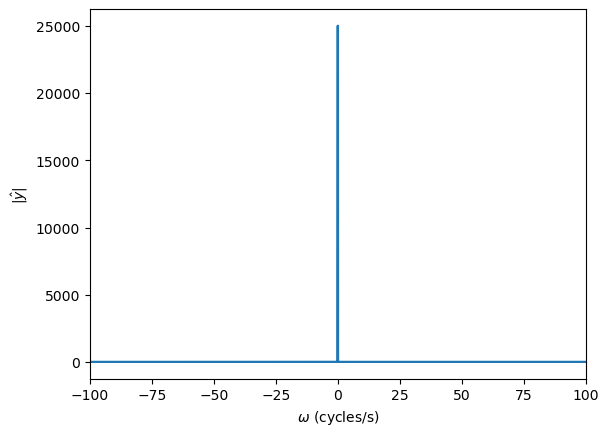

In [211]:
# Generate a signal
samplingFreq = 500; # sampled at 1 kHz = 1000 samples / second
tlims = [0,100]        # in seconds
signalFreq = [0.01,0.05]; # Cycles / second
signalMag = [1,1]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

# Plot the signal
plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

# Plot the power spectrum
plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");
plt.show()

In [212]:
b = pd.read_csv("b.csv",header=None).to_numpy().flatten()

In [213]:
b

array([ 0.0000e+00, -3.8501e-06, -1.5525e-05, -3.5192e-05, -6.2990e-05,
       -9.9032e-05, -1.4340e-04, -1.9615e-04, -2.5729e-04, -3.2683e-04,
       -4.0472e-04, -4.9088e-04, -5.8522e-04, -6.8759e-04, -7.9783e-04,
       -9.1573e-04, -1.0410e-03, -1.1735e-03, -1.3129e-03, -1.4587e-03,
       -1.6108e-03, -1.7686e-03, -1.9317e-03, -2.0998e-03, -2.2723e-03,
       -2.4487e-03, -2.6285e-03, -2.8111e-03, -2.9961e-03, -3.1827e-03,
       -3.3703e-03, -3.5584e-03, -3.7463e-03, -3.9334e-03, -4.1189e-03,
       -4.3022e-03, -4.4825e-03, -4.6593e-03, -4.8318e-03, -4.9993e-03,
       -5.1611e-03, -5.3165e-03, -5.4649e-03, -5.6055e-03, -5.7377e-03,
       -5.8608e-03, -5.9741e-03, -6.0772e-03, -6.1692e-03, -6.2498e-03,
       -6.3182e-03, -6.3739e-03, -6.4165e-03, -6.4454e-03, -6.4602e-03,
       -6.4605e-03, -6.4459e-03, -6.4161e-03, -6.3707e-03, -6.3094e-03,
       -6.2320e-03, -6.1384e-03, -6.0284e-03, -5.9018e-03, -5.7586e-03,
       -5.5989e-03, -5.4225e-03, -5.2297e-03, -5.0205e-03, -4.79

In [214]:
a = np.array([1])

In [215]:
a

array([1])

## 4. Filter coefficients

We want to find the filter coefficients for the discrete update:
$$y[n] = a_1 y[n-1] + a_2 y[n-2] + ... + b_0 x[n] + b_1 x[n-1] + ...$$

The coefficients can be taken directly from the discrete transfer function of the filter in the form:
$$H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \ldots}{1 - a_1 z^{-1} - a_2 z^{-2} + \ldots}$$

(This is a result of taking the Z-transform which is not shown here)

Compare this to a transfer function with coefficients
<code>
num = [b_0, b_1, b_2]
den = [1, a_1, a_2]
</code>
is 
$$H(z) = \frac{b_0 z^2 + b_1 z + b_2}{z^2 + a_1 z + a_2}$$
which is equivalent to
$$H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$
So you can take the coefficients in the same order that they are defined in the numerator and denominator of the transfer function object. The only difference is that the **coefficients in the denominator need a negative sign**.

* To filter the signal, apply the filter using the discrete update
* The filtered signal and filtered signal power spectrum are plotted alongside the unfiltered signal

Filter coefficients b_i: [ 0.0000e+00 -3.8501e-06 -1.5525e-05 -3.5192e-05 -6.2990e-05 -9.9032e-05
 -1.4340e-04 -1.9615e-04 -2.5729e-04 -3.2683e-04 -4.0472e-04 -4.9088e-04
 -5.8522e-04 -6.8759e-04 -7.9783e-04 -9.1573e-04 -1.0410e-03 -1.1735e-03
 -1.3129e-03 -1.4587e-03 -1.6108e-03 -1.7686e-03 -1.9317e-03 -2.0998e-03
 -2.2723e-03 -2.4487e-03 -2.6285e-03 -2.8111e-03 -2.9961e-03 -3.1827e-03
 -3.3703e-03 -3.5584e-03 -3.7463e-03 -3.9334e-03 -4.1189e-03 -4.3022e-03
 -4.4825e-03 -4.6593e-03 -4.8318e-03 -4.9993e-03 -5.1611e-03 -5.3165e-03
 -5.4649e-03 -5.6055e-03 -5.7377e-03 -5.8608e-03 -5.9741e-03 -6.0772e-03
 -6.1692e-03 -6.2498e-03 -6.3182e-03 -6.3739e-03 -6.4165e-03 -6.4454e-03
 -6.4602e-03 -6.4605e-03 -6.4459e-03 -6.4161e-03 -6.3707e-03 -6.3094e-03
 -6.2320e-03 -6.1384e-03 -6.0284e-03 -5.9018e-03 -5.7586e-03 -5.5989e-03
 -5.4225e-03 -5.2297e-03 -5.0205e-03 -4.7951e-03 -4.5536e-03 -4.2965e-03
 -4.0239e-03 -3.7362e-03 -3.4338e-03 -3.1172e-03 -2.7868e-03 -2.4432e-03
 -2.0870e-03 -1.7187e-03 -

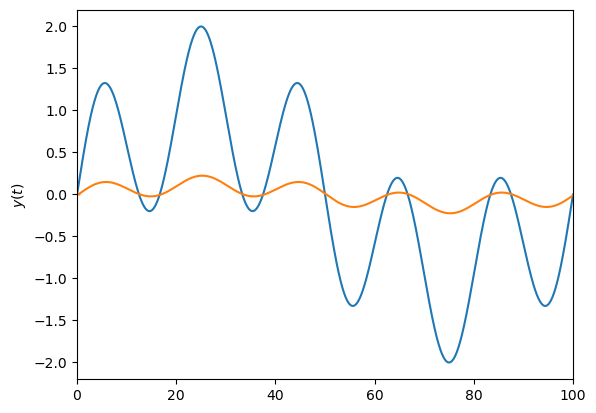

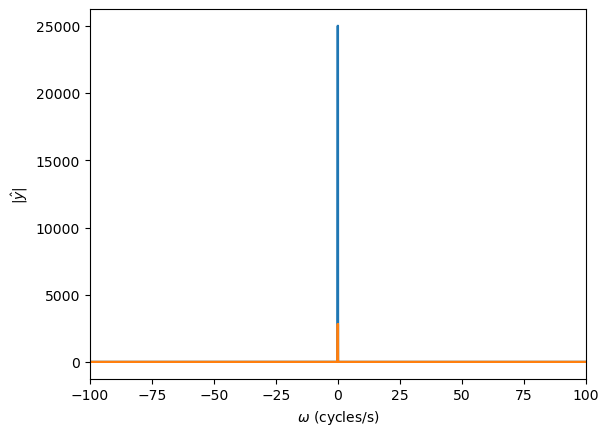

In [216]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)
print("Filter coefficients b_i: " + str(b))
#print("Filter coefficients a_i: " + str(a[0:]))

b = b
a = -a

# Filter the signal
yfilt = np.zeros(len(y))
for i in range(len(b),len(y)):
    for j in range(0,len(b),1):
        yfilt[i] += b[j]*y[i-j]
    
# Plot the signal
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);
plt.show()

# Generate Fourier transform
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.plot(fcycles,np.absolute(yfilthat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");
plt.show()